=== DATA SHAPE ===
(95662, 16)

=== MISSING VALUES ===
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

=== SAMPLE TRANSACTIONS ===
              TransactionId         BatchId       AccountId  \
13453   TransactionId_76991  BatchId_131524  AccountId_4841   
87365    TransactionId_8328   BatchId_43996  AccountId_4796   
2063   TransactionId_100056   BatchId_73011  AccountId_4841   
83234    TransactionId_5957   BatchId_87885  AccountId_2768   
17197  TransactionId_121764   BatchId_61303  AccountId_3507   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
13453  SubscriptionId_3829  Custome

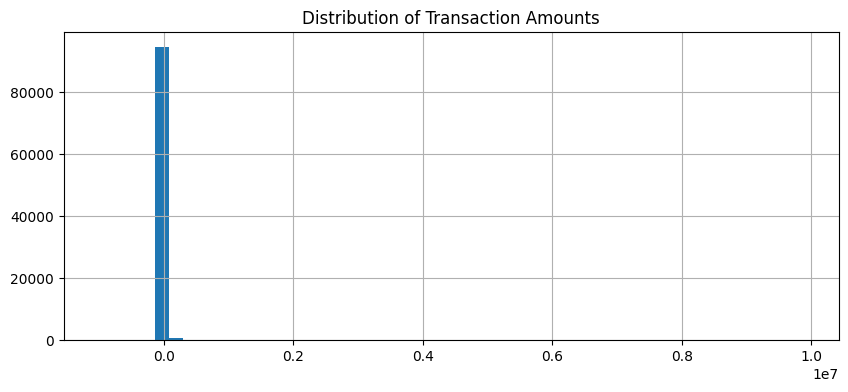

In [ ]:
# notebooks/1.0-eda.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Load Data ==========
data = pd.read_csv("../data/raw/data.csv")
variable_defs = pd.read_excel("../data/raw/Xente_Variable_Definitions.xlsx") 

# ========== 2. Data Overview (Task 2 Requirement) ==========
print("=== DATA SHAPE ===")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

print("\n=== DATA TYPES ===")
print(data.dtypes.value_counts())

print("\n=== SAMPLE TRANSACTIONS (Full Columns) ===")
pd.set_option('display.max_columns', None)
display(data.sample(5))

# ========== 3. Summary Statistics (Task 2 Requirement) ==========
print("\n=== NUMERICAL FEATURES SUMMARY ===")
print(data.describe())

print("\n=== CATEGORICAL FEATURES SUMMARY ===")
cat_cols = data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\n{col}:")
    print(data[col].value_counts().head())

# ========== 4. Missing Values (Task 2 Requirement) ==========
print("\n=== MISSING VALUES ===")
missing = data.isnull().sum()
print(missing[missing > 0])

# ========== 5. Distribution Plots (Task 2 Requirement) ==========
plt.figure(figsize=(15, 10))

# Numerical Features
num_cols = ['Amount', 'Value']
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    
# Categorical Features (Top 10 categories)
cat_plot_cols = ['ProductCategory', 'ChannelId']
for i, col in enumerate(cat_plot_cols, 3):
    plt.subplot(2, 2, i)
    data[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 {col}")

plt.tight_layout()
plt.show()

# ========== 6. Transaction Analysis ==========
print("\n=== TRANSACTION TYPES ===")
data['TransactionType'] = data['Amount'].apply(lambda x: 'Debit' if x > 0 else 'Credit')
print(data['TransactionType'].value_counts())

# ========== 7. Correlation Analysis (Task 2 Requirement) ==========
print("\n=== NUMERICAL FEATURE CORRELATIONS ===")
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# ========== 8. Outlier Detection (Task 2 Requirement) ==========
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['Amount'])
plt.title("Boxplot of Transaction Amounts")
plt.show()